In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [ ]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


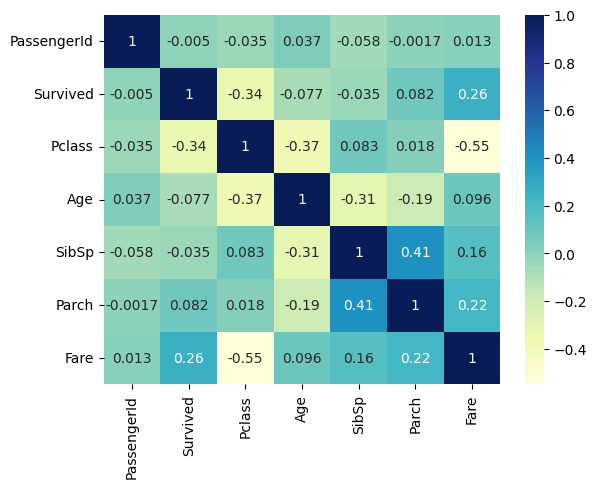

In [ ]:
# Keep only the Numerical values
numeric_data = data.select_dtypes(include=['float', 'int'])
sns.heatmap(numeric_data.corr(), cmap='YlGnBu', annot=True)
plt.show()

1- Pclass has a negative correlation

2- Fare has a positive correlation

rest of the values are kind of irrelevent

lets try oneHotEncoding the [Gender, Embarked] features in order to represent them on the correlation plot



In [ ]:
def Filter_My_Data(mydata):
  my_filtered_data = mydata.copy()

  my_filtered_data['Male'] = (my_filtered_data['Sex'] == 'male').astype(int)            # Create the male column
  my_filtered_data['Female'] = (my_filtered_data['Sex'] == 'female').astype(int)        # Create the female column

  my_filtered_data['S'] = (my_filtered_data['Embarked'] == 'S').astype(int)
  my_filtered_data['C'] = (my_filtered_data['Embarked'] == 'C').astype(int)
  my_filtered_data['Q'] = (my_filtered_data['Embarked'] == 'Q').astype(int)

  my_filtered_data.drop(['Sex', 'Embarked'], axis=1, inplace=True)                   # Drop old feature
  my_filtered_data.drop(['Name', 'Age', 'Ticket', 'Cabin'], axis=1, inplace=True)    # Drop irrelevent feature
  return my_filtered_data



In [ ]:
filtered_data = Filter_My_Data(data)
filtered_data

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Male,Female,S,C,Q
0,1,0,3,1,0,7.2500,1,0,1,0,0
1,2,1,1,1,0,71.2833,0,1,0,1,0
2,3,1,3,0,0,7.9250,0,1,1,0,0
3,4,1,1,1,0,53.1000,0,1,1,0,0
4,5,0,3,0,0,8.0500,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,13.0000,1,0,1,0,0
887,888,1,1,0,0,30.0000,0,1,1,0,0
888,889,0,3,1,2,23.4500,0,1,1,0,0
889,890,1,1,0,0,30.0000,1,0,0,1,0


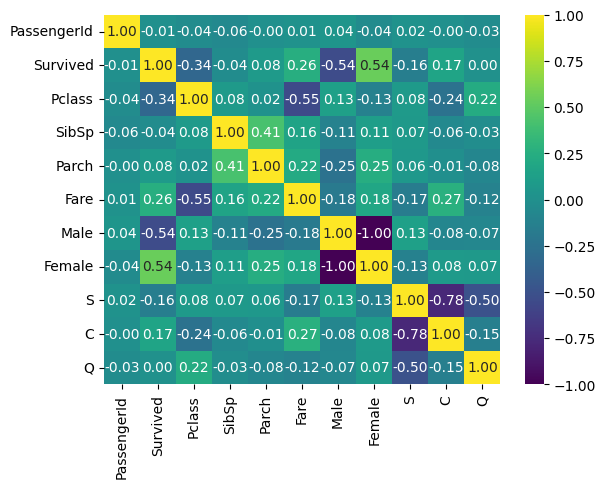

In [ ]:
numeric_data = filtered_data.select_dtypes(include=['float', 'int'])

#sns.heatmap(numeric_data.corr(), cmap='YlGnBu')
sns.heatmap(numeric_data.corr(), cmap='viridis', annot=True, fmt='.2f')
#sns.heatmap(numeric_data.corr(), cmap='magma')

plt.show()

lets update the old findings...

1- Pclass has a negative correlation

2- Fare has a positive correlation

3- Males were less likley to survive

4- Females were more likley to survive

any other features have abs(correlation) < 0.2 I deem irrelevent, low effect   

Now I want to split my data into train and test data, but not randomly as I might by chance get an imbalnced distribution in one of the sets, for example the test data might not contain any people from first class, males, etc...

I will use the StratifiedShuffleSplit


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
# Define the StratifiedShuffleSplit
Split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)                       # 1 split, 20% test data

# Split the data
for train_index, test_index in Split.split(filtered_data, filtered_data[['Survived', 'Pclass', 'Male', 'Female']]):     # Features I want equally distributed
    strat_train_data = filtered_data.loc[train_index]
    strat_test_data = filtered_data.loc[test_index]

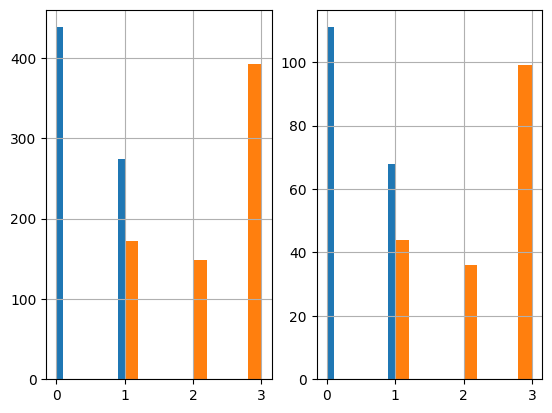

In [ ]:
plt.subplot(1, 2, 1)
strat_train_data['Survived'].hist()
strat_train_data['Pclass'].hist()

plt.subplot(1, 2, 2)
strat_test_data['Survived'].hist()
strat_test_data['Pclass'].hist()

plt.show()

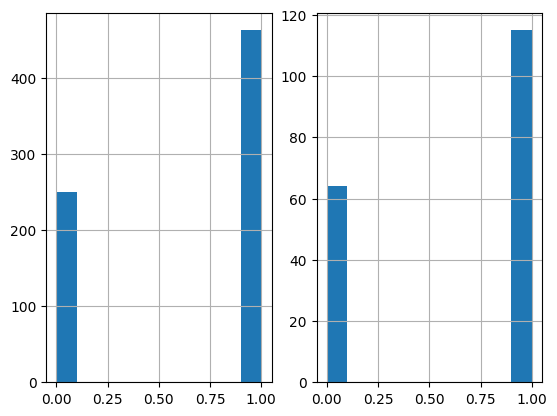

In [ ]:
plt.subplot(1, 2, 1)
strat_train_data['Male'].hist()

plt.subplot(1, 2, 2)
strat_test_data['Male'].hist()

plt.show()

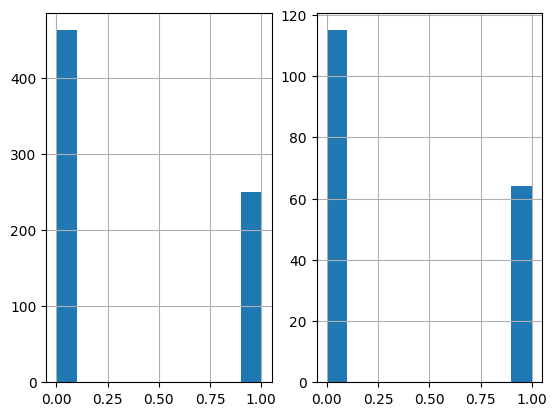

In [ ]:
plt.subplot(1, 2, 1)
strat_train_data['Female'].hist()

plt.subplot(1, 2, 2)
strat_test_data['Female'].hist()

plt.show()

In [ ]:
strat_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 803 to 771
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   SibSp        712 non-null    int64  
 4   Parch        712 non-null    int64  
 5   Fare         712 non-null    float64
 6   Male         712 non-null    int64  
 7   Female       712 non-null    int64  
 8   S            712 non-null    int64  
 9   C            712 non-null    int64  
 10  Q            712 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 66.8 KB


Checking that all my features don't contain any Null values

In [ ]:
X_train_data = strat_train_data.drop(['Survived'], axis=1)
Y_train_data = strat_train_data['Survived']

Part_2 - Training The Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

classifier = RandomForestClassifier()

parameters = [{
                "n_estimators": [10, 100, 1000],
                "max_depth": [5, 10, 15],
                "min_samples_split": [2, 5, 10]
               }]

grid_search = GridSearchCV(classifier, parameters, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_data, Y_train_data)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 10, 15],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': [10, 100, 1000]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
best_classifier = grid_search.best_estimator_
best_classifier

RandomForestClassifier(max_depth=5, n_estimators=1000)

In [ ]:
X_test_data = strat_test_data.drop(['Survived'], axis=1)
Y_test_data = strat_test_data['Survived']

Testing using the best classifier parameters and reveling the score

In [ ]:
best_classifier.score(X_test_data, Y_test_data)*100

82.68156424581005

The score is good now lets train the model on the entire data including the train and the test portions preparing it for the final test

data stored in "filtered_data"

I will be running the same grid_search code used above


In [ ]:
X_final = filtered_data.drop(['Survived'], axis=1)
Y_final = filtered_data['Survived']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

final_classifier = RandomForestClassifier()

parameters = [{
                "n_estimators": [10, 100, 1000],
                "max_depth": [5, 10, 15],
                "min_samples_split": [2, 5, 10]
               }]

grid_search = GridSearchCV(final_classifier, parameters, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_final, Y_final)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 10, 15],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': [10, 100, 1000]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
best_final_classifier = grid_search.best_estimator_
best_final_classifier

RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=1000)

Now I will read the final test data provided by kaggle and filter the data so it has the same format as filtered_data, removing irrelevent features

In [ ]:
final_test_data = pd.read_csv('test.csv')

In [ ]:
final_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
filtered_final_test_data = Filter_My_Data(final_test_data)
filtered_final_test_data

,PassengerId,Pclass,SibSp,Parch,Fare,Male,Female,S,C,Q
0,892,3,0,0,7.8292,1,0,0,0,1
1,893,3,1,0,7.0000,0,1,1,0,0
2,894,2,0,0,9.6875,1,0,0,0,1
3,895,3,0,0,8.6625,1,0,1,0,0
4,896,3,1,1,12.2875,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,8.0500,1,0,1,0,0
414,1306,1,0,0,108.9000,0,1,0,1,0
415,1307,3,0,0,7.2500,1,0,1,0,0
416,1308,3,0,0,8.0500,1,0,1,0,0


Let's check for any Null values before running my test

In [ ]:
filtered_final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   Fare         417 non-null    float64
 5   Male         418 non-null    int64  
 6   Female       418 non-null    int64  
 7   S            418 non-null    int64  
 8   C            418 non-null    int64  
 9   Q            418 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 32.8 KB


There is a Null value in the Fare feature let's fix that using the Forward-fill method from the filna function


In [ ]:
ready_test_data = filtered_final_test_data.copy()
ready_test_data = ready_test_data.fillna(method="ffill")

Now there are no Null values

I am ready to make my final predictions

In [ ]:
My_Results = best_final_classifier.predict(ready_test_data)

In [ ]:
My_Results

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Transform the numpy array into a pandas dataframe which matches the required Kaggle format in gender_submissions.csv

In [ ]:
new_dataframe = pd.DataFrame(final_test_data['PassengerId'])
new_dataframe['Survived'] = My_Results

In [ ]:
new_dataframe

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Now that i have the required format i will save it to a new csv file
- Without the Index

In [ ]:
new_dataframe.to_csv('My_Results.csv', index=False)